# Decision Tree

## Import Libraries

In [72]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Load Dataset

In [74]:
data = load_iris()
X, y = data.data, data.target

In [114]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [116]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [118]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Split dataset

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Decision Tree

In [80]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Predictions

In [82]:
y_pred = model.predict(X_test)

## Evaluation

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualize the Decision Tree

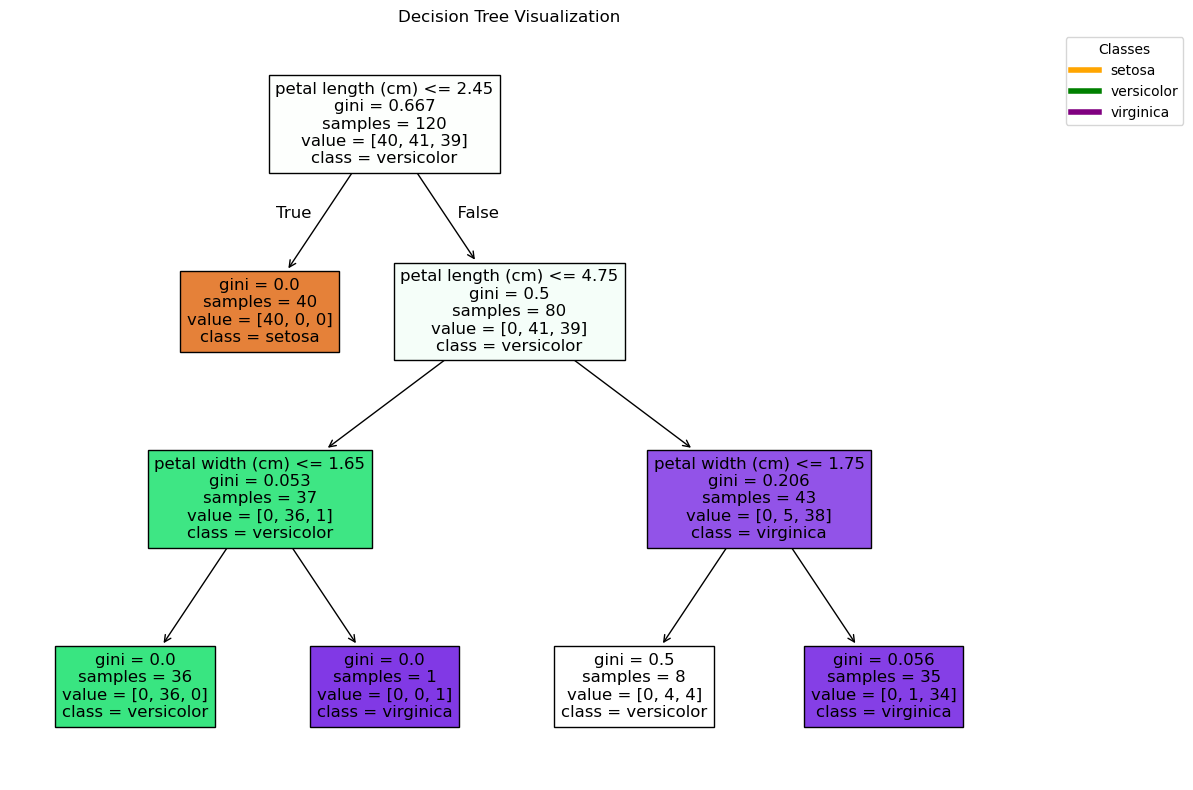

In [86]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")

colors = ['orange', 'green', 'purple']  # Colors used in the tree
classes = data.target_names  # Class names
handles = [plt.Line2D([0], [0], color=color, lw=4, label=cls) for color, cls in zip(colors, classes)]
plt.legend(handles=handles, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()

plt.show()

## Text Representation

In [88]:
tree_rules = export_text(model, feature_names=data.feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2

